For solving path dependencies

In [1]:
import sys
import os

current_dir = %pwd

# Detect the parent directory dynamically
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(parent_dir)

History for fold 1 :


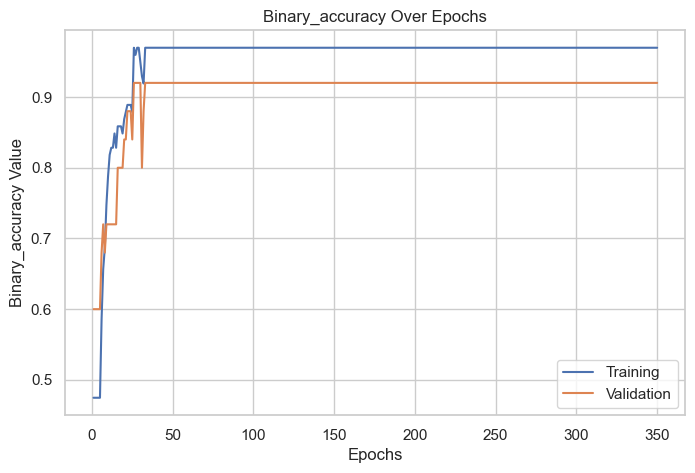

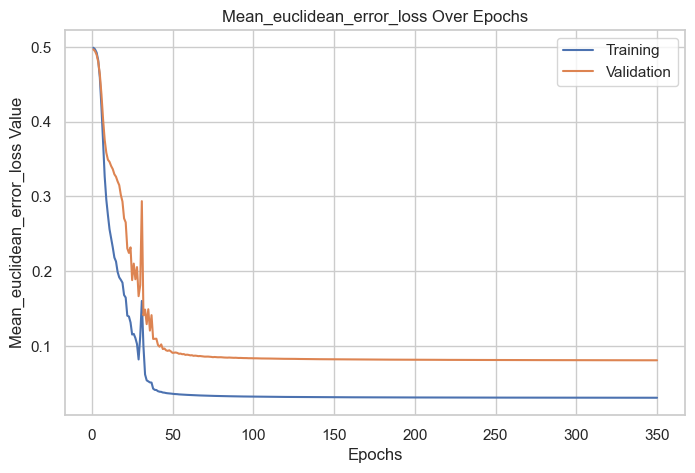

History for fold 2 :


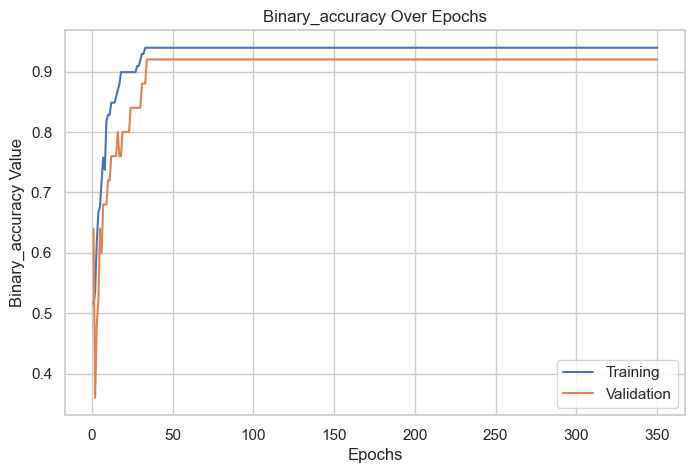

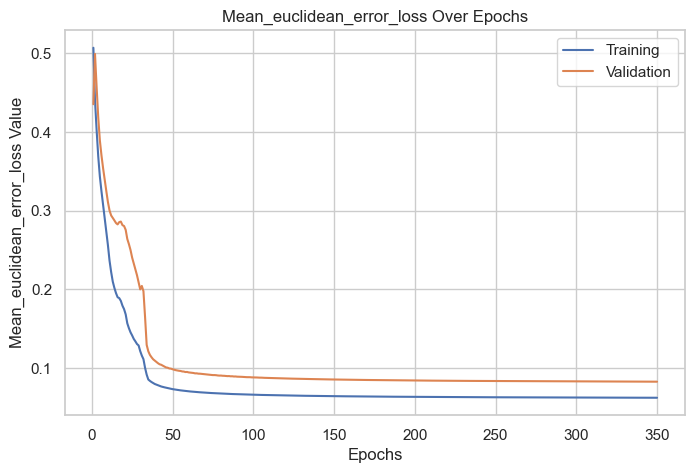

History for fold 3 :


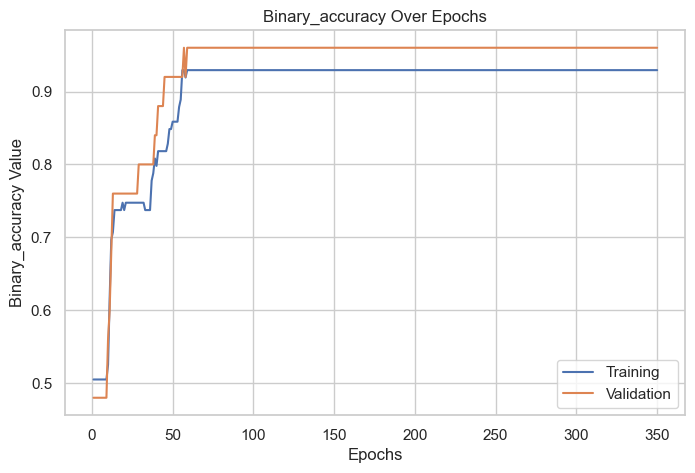

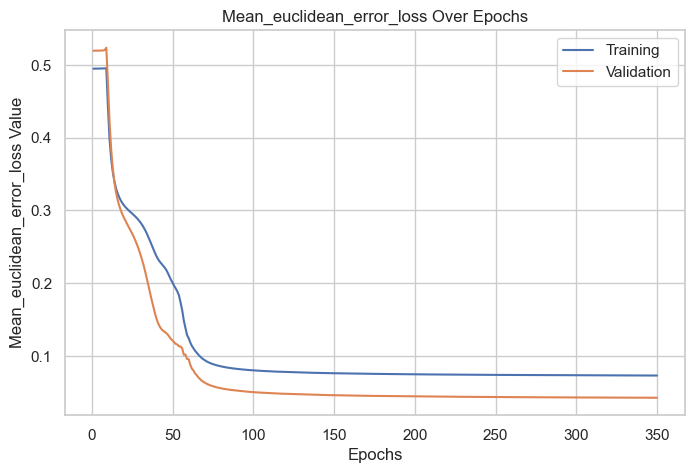

History for fold 4 :


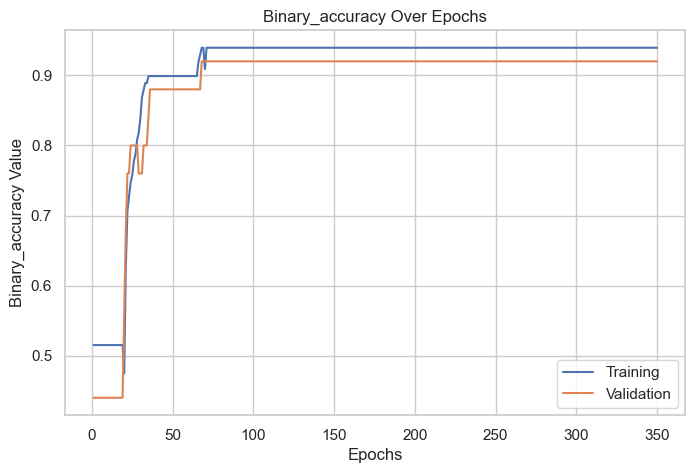

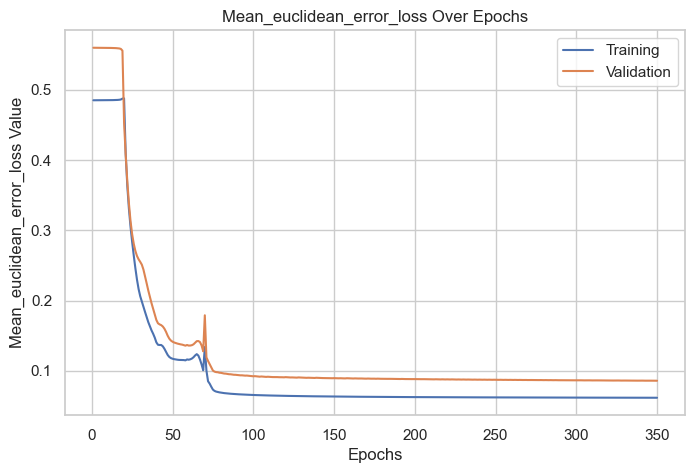

History for fold 5 :


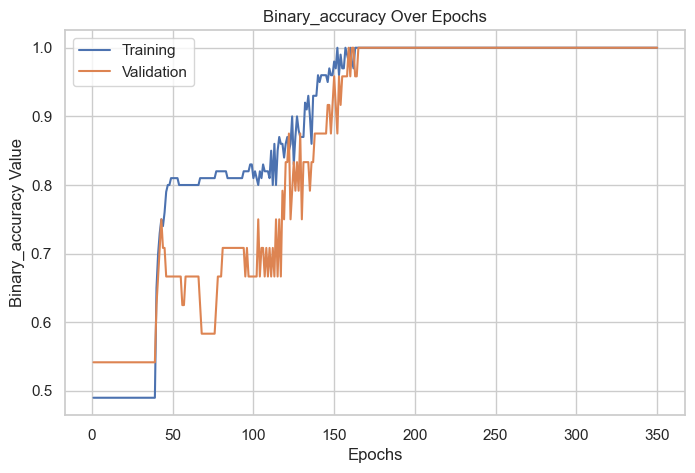

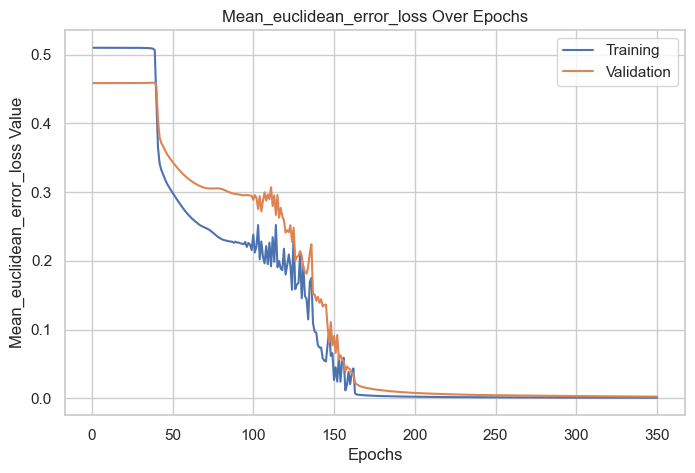

------ Train scores: ------ 
{'binary_accuracy': 0.9555555555555555, 'mean_euclidean_error_loss': 0.045739423338459935} {'binary_accuracy': 0.026028482276212368, 'mean_euclidean_error_loss': 0.026528430410457188}
------ Validation scores: ------ 
{'binary_accuracy': 0.944, 'mean_euclidean_error_loss': 0.058906303289313636} {'binary_accuracy': 0.03199999999999997, 'mean_euclidean_error_loss': 0.03234940012039696}
------ Test scores: ------ 
{'binary_accuracy': 1.0, 'mean_euclidean_error_loss': 0.002377638863978693}
------ Best model: ------ 

Model Summary:
Optimizer: Stochastic Gradient Descent
Learning rate: 0.5
Momentum: 0.3
Loss: mean_euclidean_error_loss
Metrics: ['binary_accuracy']
Regularizer: None
 
-------- Dense Layer --------
Input size:  17
Output size:  3
Weights initializer:  Range
Bias initializer:  Zeros
Activation:  ReLu
Parameters:  54
-------- Dense Layer --------
Input size:  3
Output size:  1
Weights initializer:  Range
Bias initializer:  Zeros
Activation:  Sigmoid


In [2]:
from src.main.dataset_handler import get_monk
from src.main.evaluation.grid_search import RandomGridSearch
from src.main.utils import load_hparams, plot_history

x_train, y_train, x_test, y_test = get_monk(1)

hyperparameters = load_hparams("monk1")
grid_search = RandomGridSearch(hyperparameters)


((train_mean, train_std), (val_mean, val_std)), model, params, histories = (
    grid_search.run_search(x_train, y_train, False, combinations=50))
epoch, batch_size = params

for i,history in enumerate(histories):
    print("History for fold", i+1, ":")
    plot_history(history)


print("------ Train scores: ------ ")
print(train_mean, train_std)
print("------ Validation scores: ------ ")
print(val_mean, val_std)
print("------ Test scores: ------ ")
print(model.evaluate(x_test, y_test))

print("------ Best model: ------ ")
model.summary()

print("------ Best parameters: ------ ")
print("Epoch: ", epoch)
print("Batch size: ", batch_size)


In [3]:
"""from src.main.utils import compute_metrics, log_experiment, setup_experiment

log_experiment(setup_experiment("ex1"),model, train_mean, train_std, val_mean, val_std, test_mean, test_std)"""

'from src.main.utils import compute_metrics, log_experiment, setup_experiment\n\nlog_experiment(setup_experiment("ex1"),model, train_mean, train_std, val_mean, val_std, test_mean, test_std)'

TEST SCORE:  {'binary_accuracy': 0.9166666666666666, 'mean_squared_error': 0.046787931971512445}


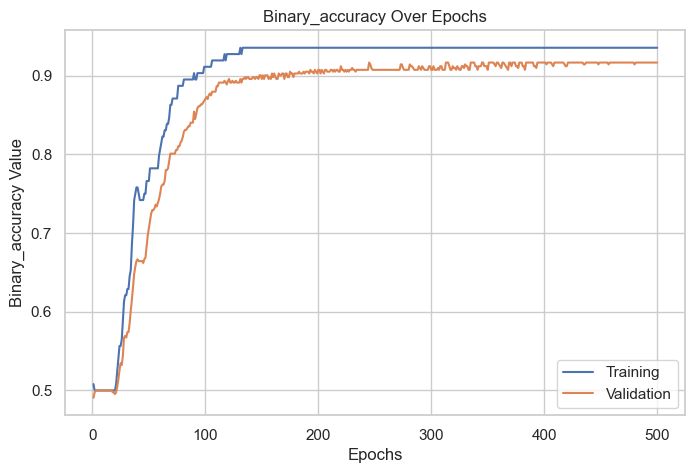

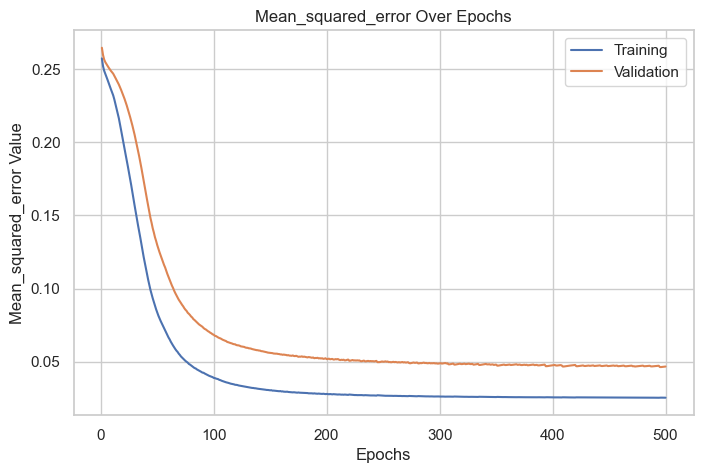

In [4]:

from src.main.dataset_handler import get_monk
from src.main.models.layers.dense import Dense
from src.main.models.model import Model
from src.main.optimizer import SGD
from src.main.regularizer import L2
from src.main.utils import plot_history

x_train, y_train, x_test, y_test = get_monk(1)

model = Model()
model.add(Dense(17, 4, activation="relu", weight_initializer="glorot_uniform", bias_initializer="zeros"))
model.add(Dense(4, 1, activation="sigmoid", weight_initializer="glorot_uniform", bias_initializer="zeros"))

optimizer = SGD(learning_rate=0.1, momentum=0.5)
l2 = L2(0)

model.compile(optimizer=optimizer, loss="mean_squared_error", metrics=["binary_accuracy"])

_, history = model.fit(x_train, y_train, x_test, y_test, epochs=500, batch_size=8, verbose=False)

print("TEST SCORE: ", model.evaluate(x_test, y_test))

plot_history(history)

